<a href="https://colab.research.google.com/github/Feev004/Colab_Artifical_Intelligence/blob/main/Dormitory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Do you travel by walking or driving? : walking 
Position : 
	Dormitory
	University
	W/B
	W/B1
	B1
	B2
	b1
	b1.1
	b2
	b3
	b4
Enter frist position : Dormitory
Enter last position : University
Shortest path from Dormitory to University: ['Dormitory', 'b1', 'b1.1', 'b2', 'b3', 'b4', 'University']


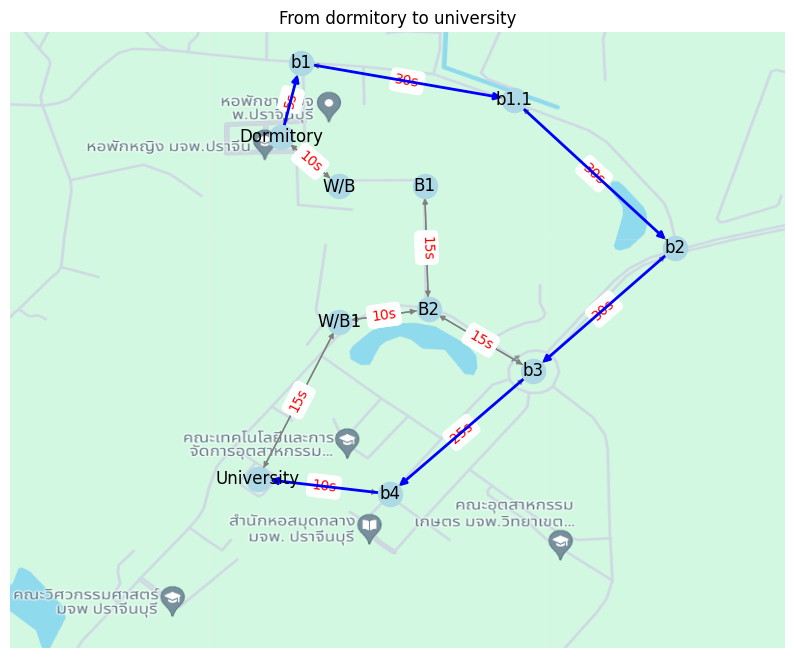

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# สร้างกราฟพร้อมตำแหน่งและระยะทาง
position = ['Dormitory', 'University',
            'W/B1', 'B1', 'W/B', 'B2',
            'b1', 'b1.1', 'b2', 'b3', 'b4']
char = input(f"Do you travel by walking or driving? : ")
if char == "walking":
  distances = {
    ('Dormitory', 'W/B'): 10, ('W/B', 'Dormitory'): 10,
    ('Dormitory', 'b1'): 5, ('b1', 'Dormitory'): 5,
    ('b1', 'b1.1'): 60, ('b1.1', 'b1'): 60,
    ('b1.1', 'b2'): 60, ('b2', 'b1.1'): 60,
    ('b2', 'b3'): 60, ('b3', 'b2'): 60,
    ('b3', 'b4'): 25, ('b4', 'b3'): 25,
    ('W/B', 'W/B1'): 15, ('W/B1', 'W/B'): 15,
    ('W/B', 'B1'): 10, ('B1', 'W/B'): 10,
    ('B1', 'B2'): 15, ('B2', 'B1'): 15,
    ('b3', 'B2') : 15, ('B2', 'b3') : 15,
    ('B2', 'W/B1'): 10, ('W/B1', 'B2'): 10,
    ('b4', 'University'): 10, ('University', 'b4'): 10,
    ('W/B1', 'University'): 15, ('University', 'W/B1'): 15
    }
elif char == "driving":
  distances = {
    ('Dormitory', 'W/B'): 10, ('W/B', 'Dormitory'): 10,
    ('Dormitory', 'b1'): 5, ('b1', 'Dormitory'): 5,
    ('b1', 'b1.1'): 30, ('b1.1', 'b1'): 30,
    ('b1.1', 'b2'): 30, ('b2', 'b1.1'): 30,
    ('b2', 'b3'): 30, ('b3', 'b2'): 30,
    ('b3', 'b4'): 25, ('b4', 'b3'): 25,
    ('b3', 'B2') : 15, ('B2', 'b3') : 15,
    ('B2', 'W/B1'): 10, ('W/B1', 'B2'): 10,
    ('B1', 'B2'): 15, ('B2', 'B1'): 15,
    ('b4', 'University'): 10, ('University', 'b4'): 10,
    ('W/B1', 'University'): 15, ('University', 'W/B1'): 15
    }

# สร้างกราฟกำกับ
G = nx.DiGraph()

# เพิ่มโหนด (ตำแหน่ง)
G.add_nodes_from(position)

# เพิ่มขอบถ่วงน้ำหนัก (ระยะทาง)
for (point1, point2), distance in distances.items():
    G.add_edge(point1, point2, weight=distance)
    # หมายเหตุ: เพิ่มขอบในทิศทางเดียวเท่านั้นเพื่อให้มีทิศทาง
    G.add_edge(point2, point1, weight=distance)  # Ensure the graph is bidirectional

# โหลดภาพพื้นหลัง
img = mpimg.imread('Dormitory.png')  # แทนที่ 'Dormitory.png' ด้วยเส้นทางรูปภาพของคุณ

# กำหนดตำแหน่งของโหนดด้วยตนเองเพื่อให้พอดีกับรูปภาพ
pos = {
    'University': (-0.36, -0.45),  #(v,h)
    'Dormitory': (-0.3, 0.66),
    'W/B': (-0.15, 0.5),
    'W/B1': (-0.15, 0.06),
    'B1': (0.07, 0.5),
    'B2': (0.08, 0.1),
    'b1' : (-0.25, 0.9),
    'b1.1' : (0.3,0.78),
    'b2' : (0.715, 0.3),
    'b3' : (0.35, -0.1),
    'b4' : (-0.02,-0.5)
}

print(f"Position : \n\tDormitory\n\tUniversity\n\tW/B\n\tW/B1\n\tB1\n\tB2\n\tb1\n\tb1.1\n\tb2\n\tb3\n\tb4")
number1 = input("Enter frist position : ")
number2 = input("Enter last position : ")

# Find the shortest path from 'Ant' to 'G'
shortest_path = nx.shortest_path(G, source= number1, target= number2, weight='weight')  #function shotest_path ของ networkx
print(f"Shortest path from {number1} to {number2}: {shortest_path}")

# คำสั่งนี้จะสร้างกราฟของคลื่นไซน์ขนาด 10 นิ้ว x 8 นิ้วพร้อมชื่อแกนและหัวเรื่อง
plt.figure(figsize=(10, 8))

# แสดงภาพ
plt.imshow(img, extent=[-1, 1, -1, 1], aspect='auto')

# วาดกราฟ
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300, edge_color='grey', arrowsize=8, connectionstyle='arc3, rad=0')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]}s' for u, v, d in G.edges(data=True)}, font_color='red')

# Highlight the shortest path
path_edges = list(zip(shortest_path, shortest_path[1:]))  #shortest_path (original): ['Ant', 'E', 'G']  shortest_path[1:] (sliced): ['E', 'G']
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)

plt.title("From dormitory to university")
plt.show()